In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.utils import resample

import joblib

nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aniruth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aniruth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
import pandas as pd
import re

# Load dataset
df = pd.read_excel("chatgpt_style_reviews_dataset.xlsx")

print("Total rows before cleaning:", len(df))

# Show first 5 rows
df.head()


Total rows before cleaning: 250


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06 00:00:00,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,2025-03-07 00:00:00,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [2]:
def clean_text(text):
    text = str(text).lower()                     # lowercase
    text = re.sub(r"http\S+|www\S+", "", text)   # remove links
    text = re.sub(r"[^a-zA-Z\s]", " ", text)     # remove symbols/numbers
    text = re.sub(r"\s+", " ", text)             # remove extra spaces
    return text.strip()


In [3]:
# Apply cleaning
df["review"] = df["review"].apply(clean_text)

df.head()


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06 00:00:00,Claim who accept.,every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,2025-03-07 00:00:00,Growth pretty wish.,ask develop bag also his worker pass expert wh...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,if customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,to television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [4]:
# Remove empty reviews
df = df[df["review"] != ""]

# Remove very short reviews (noise)
df = df[df["review"].str.len() > 15]

print("Rows after cleaning:", len(df))


Rows after cleaning: 250


In [5]:
# Save clean dataset
df.to_excel("clean_reviews_dataset.xlsx", index=False)

print("Clean dataset saved as: clean_reviews_dataset.xlsx")


Clean dataset saved as: clean_reviews_dataset.xlsx


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("clean_reviews_dataset.xlsx")
df.head()


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06 00:00:00,Claim who accept.,every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,2025-03-07 00:00:00,Growth pretty wish.,ask develop bag also his worker pass expert wh...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,if customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,to television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


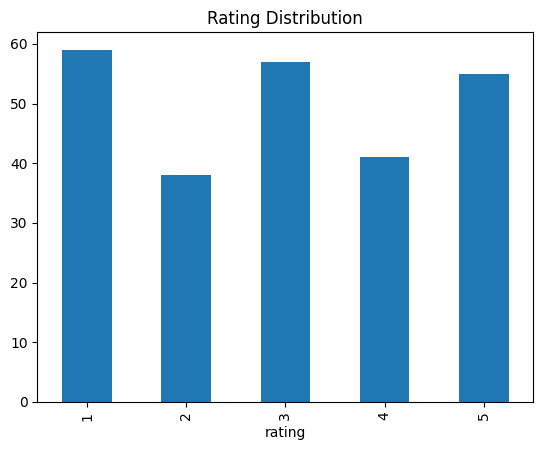

In [7]:
df["rating"].value_counts().sort_index().plot(kind="bar", title="Rating Distribution")
plt.show()


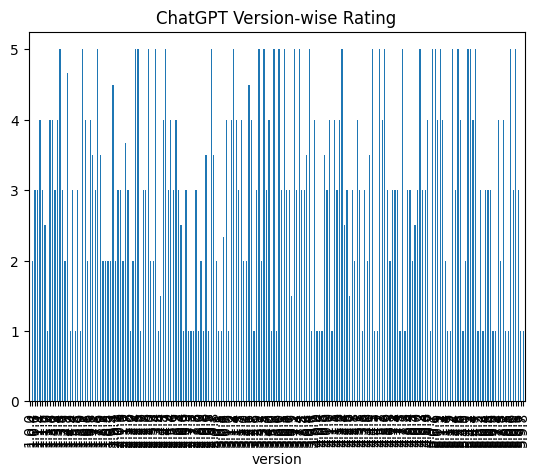

In [ ]:
df["sentiment"] = df["rating"].apply(
    lambda x: "Positive" if x >= 4 else "Neutral" if x == 3 else "Negative"
)

df["sentiment"].value_counts().plot(kind="bar", title="Sentiment Distribution")
plt.show()


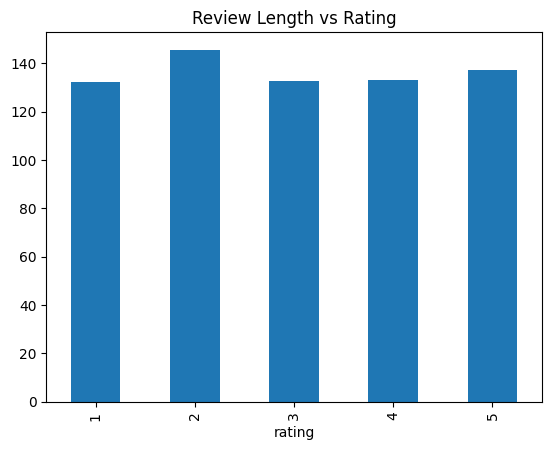

In [8]:
df["review_length"] = df["review"].str.len()
df.groupby("rating")["review_length"].mean().plot(kind="bar", title="Review Length vs Rating")
plt.show()


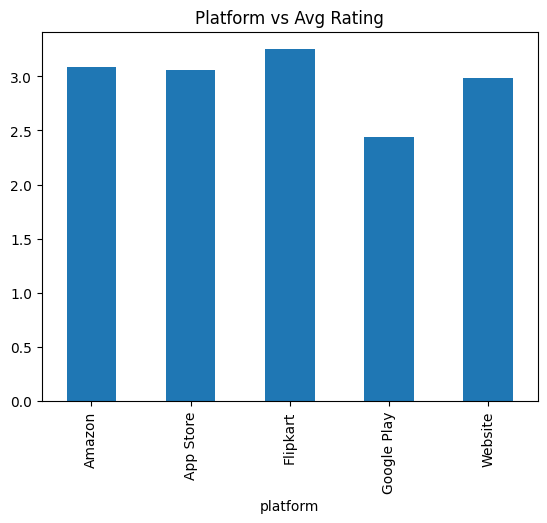

In [9]:
df.groupby("platform")["rating"].mean().plot(kind="bar", title="Platform vs Avg Rating")
plt.show()


In [10]:
import pandas as pd

# Load clean dataset
data = pd.read_excel("clean_reviews_dataset.xlsx")

print("Total rows:", len(data))
data.head()


Total rows: 250


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06 00:00:00,Claim who accept.,every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,2025-03-07 00:00:00,Growth pretty wish.,ask develop bag also his worker pass expert wh...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,if customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,to television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [11]:
# Create sentiment from rating
data["sentiment"] = data["rating"].apply(
    lambda x: "Positive" if x >= 4 else "Neutral" if x == 3 else "Negative"
)

data[["review", "rating", "sentiment"]].head()


,review,rating,sentiment
0,every quite sense including six lot have never...,4,Positive
1,ask develop bag also his worker pass expert wh...,4,Positive
2,if customer address region try near risk next ...,5,Positive
3,to television loss election him small detail r...,1,Negative
4,pass share must amount lot per manage world to...,5,Positive


In [12]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

data["clean_review"] = data["review"].apply(clean_text)

data[["review", "clean_review"]].head()


,review,clean_review
0,every quite sense including six lot have never...,every quite sense including six lot have never...
1,ask develop bag also his worker pass expert wh...,ask develop bag also his worker pass expert wh...
2,if customer address region try near risk next ...,if customer address region try near risk next ...
3,to television loss election him small detail r...,to television loss election him small detail r...
4,pass share must amount lot per manage world to...,pass share must amount lot per manage world to...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_to_number = TfidfVectorizer(max_features=2000)

X = text_to_number.fit_transform(data["clean_review"])
y = data["sentiment"]

print("Text converted to numbers")


Text converted to numbers


In [14]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression()

# Teach the model
model.fit(X, y)

print("Model training completed")


Model training completed


In [15]:
test_texts = [
    "this product is very good",
    "worst product ever",
    "it is okay average"
]

for text in test_texts:
    clean = clean_text(text)
    number = text_to_number.transform([clean])
    result = model.predict(number)[0]
    print(text, "->", result)


this product is very good -> Negative
worst product ever -> Negative
it is okay average -> Neutral
